In [1]:
import cv2
# https://inhovation97.tistory.com/56
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm import tqdm
import numpy as np

load image

In [2]:
image = cv2.imread('image18_small.jpg')
image = image[:,:,::-1] # BGR -> RGB
width = len(image[0,:,0]) 
height = len(image[:,0,0]) 

load pre-defined patch

In [3]:
for i in range(3):

    #load the patch image.
    globals()["patch{}".format(i + 1)] = cv2.imread('patch18' + str(i + 1) + '.jpg')[:,:,::-1] # BGR -> RGB

    #inverse the patch.
    globals()["patch_inversed{}".format(i + 1)] = globals()["patch" + str(i + 1)][:,::-1,:] #x inversed

    #normalize the patch.
    globals()["patch_inversed" + str(i + 1)] = globals()["patch_inversed" + str(i + 1)].astype('float64') - 128

    #define convolution map.
    globals()["convolution_map_rgb{}".format(i + 1)] = image.copy()

    #change datatype to prevent overflow.
    globals()["convolution_map_rgb" + str(i + 1)] = globals()["convolution_map_rgb" + str(i + 1)].astype('float64')

do convolution.

In [4]:
for p in range(3):
    patch_width = len(globals()['patch' + str(p + 1)][0,:,0]) 
    patch_height = len(globals()['patch' + str(p + 1)][:,0,0])

    #https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape
    #do padding for patch size.
    #normalize by subtracting 128.
    globals()["image{}".format(p + 1)] = cv2.copyMakeBorder(src = image.copy(), top = int(patch_height/2), bottom = int(patch_height/2), left = int(patch_width/2), right = int(patch_width/2), borderType = cv2.BORDER_CONSTANT, value= [0, 0, 0]).astype('float64') - 128

    #do normalization for patch and the original image.

    #do convolution.
    for img_y in tqdm(range(height)):
        for img_x in range(width):
            for rgb in range(3):
                globals()["convolution_map_rgb" + str(p + 1)][img_y, img_x, rgb] = 0
                for patch_y in range(patch_height):
                    for patch_x in range(patch_width):
                        globals()["convolution_map_rgb" + str(p + 1)][img_y, img_x, rgb] +=  globals()["patch_inversed" + str(p + 1)][patch_y, patch_x, rgb].astype('float64') * globals()["image" + str(p + 1)][img_y + patch_y, img_x + patch_x, rgb].astype('float64')

    #sum the convolution values.
    globals()["convolution_map{}".format(p + 1)] = globals()["convolution_map_rgb" + str(p + 1)].sum(axis = 2)

    

100%|██████████| 170/170 [01:14<00:00,  2.29it/s]


find the bounding box

In [5]:
####################
#testing
for p in range(3):
    #sum the convolution values.
    globals()["convolution_map{}".format(p + 1)] = globals()["convolution_map_rgb" + str(p + 1)].sum(axis = 2)
print(globals()["convolution_map_rgb1"].shape)
print(globals()["convolution_map1"].shape)

(170, 120, 3)
(170, 120)


print the result

In [6]:
fig = plt.figure(dpi=200, tight_layout=True)
gs = gridspec.GridSpec(nrows = 3, ncols = 4,width_ratios = [8, 1, 8, 8])

<Figure size 1280x960 with 0 Axes>

[]

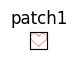

In [10]:
#patch1
# ax0 = plt.subplot(gs[0])
# ax0.imshow(globals()['patch1'])
# ax0.set_title('patch1')
# ax0.set_xticks([])
# ax0.set_yticks([])

ax1 = plt.subplot(gs[1])
ax1.imshow(globals()['patch1'])
ax1.set_title('patch1')
ax1.set_xticks([])
ax1.set_yticks([])

show convolution results.

[]

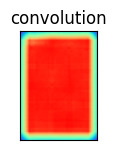

In [11]:
ax2 = plt.subplot(gs[2])
#ax2.imshow(image)
ax2.imshow(globals()["convolution_map1"], cmap="rainbow", interpolation= 'bilinear')
ax2.set_title('convolution')
#cbarax = fig.add_subplot(gs[2])
ax2.set_xticks([])
ax2.set_yticks([])


26
18
26
45
26
46
26
47
26
48
26
49
26
50
26
51
26
75
26
76
27
49
27
50
28
49
29
49
30
49
31
49
60
14
70
77
70
78
71
77
72
77
73
77
73
78
76
77
76
78
79
14
79
15
79
16
79
17
79
18
79
19
79
77
80
14
80
15
80
16
80
17
80
18
80
19
81
14
81
15
81
16
81
17
81
18
81
19
81
20
81
77
82
14
82
15
82
16
82
17
82
18
82
19
82
20
82
77
82
78
82
79
83
14
83
15
83
16
83
17
83
18
83
19
83
20
83
21
83
22
83
49
83
50
83
76
83
77
83
78
83
79
83
80
83
81
84
14
84
15
84
16
84
17
84
18
84
19
84
20
84
49
84
50
84
77
84
78
84
79
84
80
85
14
85
15
85
16
85
17
85
18
85
19
85
20
85
77
85
78
85
79
86
14
86
15
86
16
86
17
86
18
86
19
86
20
86
77
86
78
86
79
87
14
87
15
87
16
87
17
87
18
87
19
87
20
87
77
87
78
87
79
88
14
88
15
88
16
88
17
88
18
88
19
88
20
88
77
88
78
88
79
88
80
89
14
89
15
89
16
89
17
89
18
89
19
89
20
89
77
89
78
90
14
90
15
90
16
90
17
90
18
90
19
90
20
90
77
90
78
91
14
91
15
91
16
91
17
91
77
92
14
92
71
92
77
93
77
94
77
94
78
95
76
95
77
95
78
95
79
95
80
96
74
96
75
96
76
96
77
96
78
96
7

[]

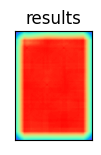

In [46]:
ax3 = plt.subplot(gs[3])

globals()["convolution_map1_normalized"] = globals()["convolution_map1"] + globals()["convolution_map1"].min()
globals()["convolution_map1_normalized"] /= globals()["convolution_map1_normalized"].max()

for i in range (globals()["convolution_map1_normalized"].shape[0]):
    for j in range (globals()["convolution_map1_normalized"].shape[1]):
        if globals()["convolution_map1_normalized"][i,j] >= .92:
            print(i)
            print(j)
print(globals()["convolution_map1_normalized"][26,76])
print(globals()["convolution_map1_normalized"][84,50])

ax3.imshow(globals()["convolution_map1_normalized"], cmap="rainbow", interpolation= 'bilinear')
ax3.set_title('results')
ax3.set_xticks([])
ax3.set_yticks([])

patch2

[]

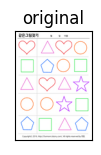

In [13]:
ax4 = plt.subplot(gs[4])
ax4.imshow(image)
ax4.set_title('original')
ax4.set_xticks([])
ax4.set_yticks([])

[]

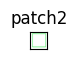

In [14]:
ax5 = plt.subplot(gs[5])
ax5.imshow(globals()['patch2'])
ax5.set_title('patch2')
ax5.set_xticks([])
ax5.set_yticks([])

[]

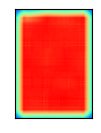

In [15]:
ax6 = plt.subplot(gs[6])
ax6.imshow(globals()["convolution_map2"], cmap="rainbow", interpolation= 'bilinear')
ax6.set_xticks([])
ax6.set_yticks([])

[]

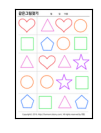

In [16]:
ax7 = plt.subplot(gs[7])
ax7.imshow(image)
ax7.set_xticks([])
ax7.set_yticks([])

patch3

[]

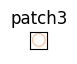

In [17]:
# ax8 = plt.subplot(gs[8])
# ax8.imshow(globals()['patch3'])
# ax8.set_title('patch3')
# ax8.set_xticks([])
# ax8.set_yticks([])

ax9 = plt.subplot(gs[9])
ax9.imshow(globals()['patch3'])
ax9.set_title('patch3')
ax9.set_xticks([])
ax9.set_yticks([])

[]

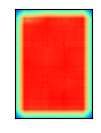

In [18]:
ax10 = plt.subplot(gs[10])
ax10.imshow(globals()["convolution_map3"], cmap="rainbow", interpolation= 'bilinear')
ax10.set_xticks([])
ax10.set_yticks([])

[]

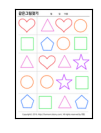

In [19]:
ax11 = plt.subplot(gs[11])
ax11.imshow(image)
ax11.set_xticks([])
ax11.set_yticks([])

In [20]:
plt.show()